In [219]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from pylab import rcParams


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
rcParams['figure.figsize'] = 8,6

In [225]:
df=pd.read_csv("student-por.csv",sep=';')

### Exploring the dataset

The file consists of grades for students of two schools in Portugal. Our response variable is going to be G3 which is the final Grade. The other two Grade variables are G1 and G2 which are earlier grades. All the grades are on a scale of 0-20. It also has 30 other features which include various deatils about the student ranging from their parents education and economic status to the amount of daily studytime. The categorical variables are either binary (eg access to internet: yes/no) or ordinal(Health:0-5, 0 being the worst and 5 being the healthiest.) We will now conduct some exploration of the data

In [226]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [227]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [228]:
df['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [229]:
print(df['reason'].value_counts())
print(df.groupby(by="reason")['G3'].mean())


course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
reason
course        11.547368
home          12.181208
other         10.694444
reputation    12.944056
Name: G3, dtype: float64


In [230]:
print(df.groupby(by="health")['G3'].mean())


health
1    12.477778
2    12.192308
3    11.838710
4    12.305556
5    11.469880
Name: G3, dtype: float64


In [231]:
print(df['famsup'].value_counts())
print(df.groupby(by="famsup")['G3'].quantile([0.25,0.5,0.75]))

yes    398
no     251
Name: famsup, dtype: int64
famsup      
no      0.25    10.0
        0.50    12.0
        0.75    14.0
yes     0.25    10.0
        0.50    12.0
        0.75    14.0
Name: G3, dtype: float64


**After further Exploration of the Dataset, we will be dropping some of the features from the dataset for various reasons, including not enough correlation or for some categorical variables, most features being biased towards one category or outliers**

In [232]:
df.drop(columns=["school","Dalc","Walc","reason","famsize","absences","health","Mjob","Fjob","activities","guardian","famsup","schoolsup","freetime"],inplace=True)

### Part 1: Prediction

**We'll be saving our response variable G3 in y**

In [233]:
y=df['G3']
x=df.drop(columns=["G3"])
#imp sex,age,address,Pstatus,Medu,Fedu, traveltime,studytime,failures,paid,nursery,higher,internet,romantic,famrel,goout,

In [234]:
x_dummies=pd.get_dummies(x,drop_first=True)
x_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,G1,G2,sex_M,address_U,Pstatus_T,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,0,11,0,1,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,9,11,0,1,1,0,0,1,1,0
2,15,1,1,1,2,0,4,2,12,13,0,1,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,14,14,0,1,1,0,1,1,1,1
4,16,3,3,1,2,0,4,2,11,13,0,1,1,0,1,1,0,0


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x_dummies,y,random_state=7,test_size=0.20)

In [236]:
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [237]:
#Using Linear regression with all variables as features

model = linear_model.LinearRegression().fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.8781350346812715 Adjusted r2 0.841575545085653

Coef: [ 0.06950797 -0.03581235  0.03059854  0.13360156  0.02056827 -0.10880876
 -0.05100187 -0.05639364  0.33065427  2.63486648 -0.10430109  0.11682425
 -0.0477909   0.00961633 -0.0250131   0.07811875  0.0311221  -0.0514821 ]


In [238]:
#Using Ridge regression with all variables

model = linear_model.Ridge(alpha=1).fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.8784015370562929 Adjusted r2 0.8419219981731807

Coef: [ 0.07070085 -0.03466384  0.03047126  0.13295335  0.02087015 -0.11052524
 -0.04980314 -0.05637776  0.3454198   2.61567991 -0.10442089  0.11640659
 -0.04780294  0.00998933 -0.02511567  0.07853281  0.03124057 -0.05213376]


In [239]:
#Using Lasso regression with all variables

model = linear_model.Lasso(alpha=1).fit(X = x_train, y = y_train)
y_pred=model.predict(x_test)
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-18-1)
print("r2:",r2,"Adjusted r2",r2_adj)
print("\nCoef:",model.coef_)

r2: 0.7752311205824793 Adjusted r2 0.7078004567572231

Coef: [-0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.          1.99512206 -0.          0.
 -0.         -0.         -0.          0.          0.         -0.        ]


**As we can see, initially when we use all features as input, Ridge regression gives out the best score, Lasso Regression performs the worst, possibly because it is ignoring all features except "G2". Henceforth, we'll be using Ridge Regression to work out which features work best by comparing the adjusted r2 value for different features**

In [240]:
#Using earlier grades G1 and G2 as features to predict G3
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9]], y = y_train)
y_pred=model.predict(x_test[:,[8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-2-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8773360947699278 Adjusted r2 0.8741080972638733


In [241]:
#Using the first half of the features to predict G3

model = linear_model.Ridge(alpha=1).fit(X = x_train[:,0:9], y = y_train)
y_pred=model.predict(x_test[:,0:9])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-9-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.7311911470454446 Adjusted r2 0.6961291227470243


In [242]:
#Using the second half of the features to predict G3

model = linear_model.Ridge(alpha=1).fit(X = x_train[:,9:], y = y_train)
y_pred=model.predict(x_test[:,9:])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-11-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.871114327921999 Adjusted r2 0.8499539937002377


In [243]:
#Using earlier grades G1,G2, address (Urban Vs Rural),Pstatus(together vs apart)  as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9,11,12]], y = y_train)
y_pred=model.predict(x_test[:,[8,9,11,12]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-4-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8780072063297866 Adjusted r2 0.8714130012665318


In [244]:
#Using earlier grades G1,G2, sex  as features with Ridge Regression
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[8,9,10]], y = y_train)
y_pred=model.predict(x_test[:,[8,9,10]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8780017278774596 Adjusted r2 0.873121796992558


In [245]:
#Using earlier grades G1,G2 and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8805001028305788 Adjusted r2 0.8757201069438019


In [246]:

#Using earlier grades G1,G2 and studytime as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[4,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[4,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-3-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8788603112643781 Adjusted r2 0.8740147237149533


In [247]:
#Using age,earlier grades G1,G2,age studytime, and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[0,4,5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[0,4,5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-5-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8818416182835578 Adjusted r2 0.8737485784399659


In [248]:
#Using earlier grades G1,G2, studytime, and failures as features
model = linear_model.Ridge(alpha=1).fit(X = x_train[:,[4,5,8,9]], y = y_train)
y_pred=model.predict(x_test[:,[4,5,8,9]])
np.clip(y_pred,0,20,out=y_pred)

r2=metrics.r2_score(y_test,y_pred)
r2_adj=1-(1-r2)*(79-1)/(79-4-1)
print("r2:",r2,"Adjusted r2",r2_adj)

r2: 0.8818154115199116 Adjusted r2 0.8754270553858527


**From the various combinations of variables used above, we got the best regression model using the Earlier grades G1,G2,studytime, and failures as our predictor variables for the response variable G3 (final grades).
The adjusted r2 for that model is .875**

Text(0, 0.5, 'Y_pred')

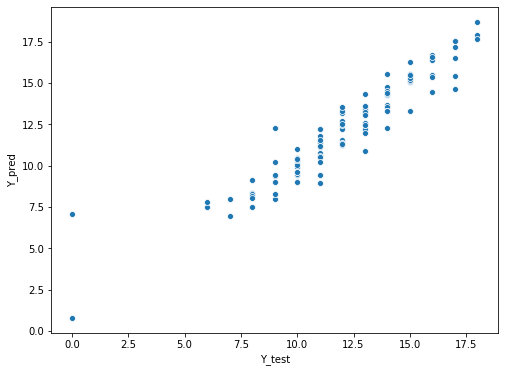

In [249]:
#View scatterplot for the ypred vs yactual for the best working model
sns.scatterplot(x=y_test,y=y_pred, palette="Accent")
plt.xlabel("Y_test")
plt.ylabel("Y_pred")

### Part 2: Clustering


In [250]:
scaler=StandardScaler().fit(x_dummies)
x_clustering=scaler.transform(x_dummies)
x_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,G1,G2,sex_M,address_U,Pstatus_T,paid_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,4,0,11,0,1,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,9,11,0,1,1,0,0,1,1,0
2,15,1,1,1,2,0,4,2,12,13,0,1,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,14,14,0,1,1,0,1,1,1,1
4,16,3,3,1,2,0,4,2,11,13,0,1,1,0,1,1,0,0


**Clustering with G1,G2,address(Urban/rural), Pstatus(parent status together/apart),higher(going to pursue higher education)**

In [251]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[8,9,11,12,15]]
k_range=range(3,9)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.3114492827810512 k: 3
0.3783637711278405 k: 4
0.4526937564281484 k: 5
0.46779947442163183 k: 6
0.44969332352354957 k: 7
0.45707074411590204 k: 8


**We can conclude that there are 6 clusters for the chosen subset**

In [252]:
#kmeans
clustering = KMeans(n_clusters = 6, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

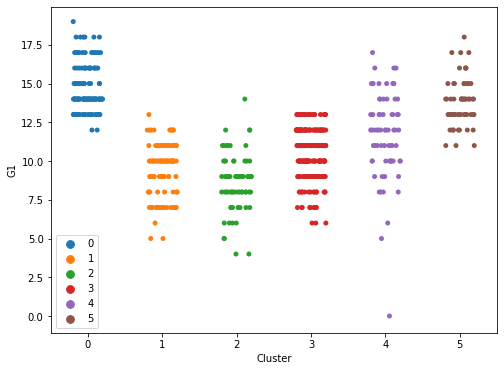

In [253]:
#clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

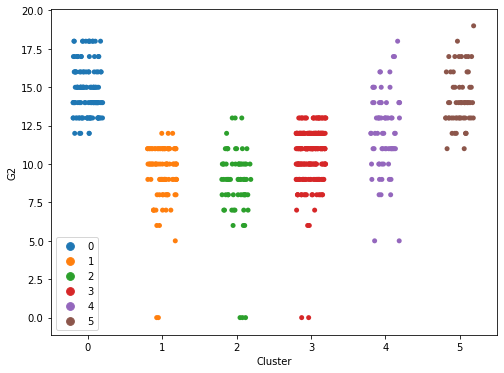

In [254]:
#Viewing clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


In [255]:
#using agglomerative clustering for the chosen subset

clustering = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

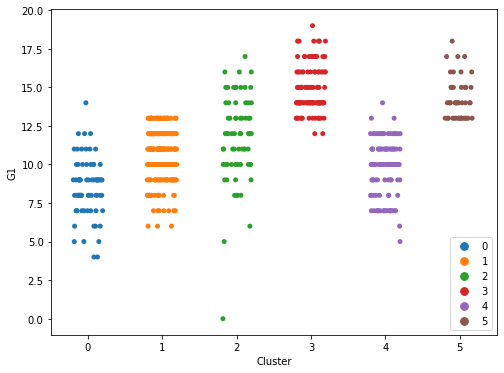

In [256]:
#clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

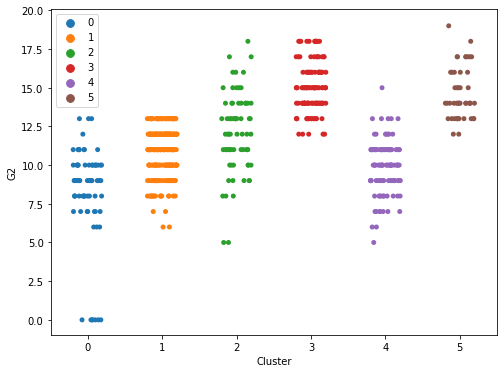

In [257]:
#Viewing clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*Looking at the plots, we can see that from the 6 identified clusters, 2 are relatively high schoring, 2 are low scoring, one is relatively average scoring and one has a lot of variation and includes really high scoring students as well as low scoring students*


*Additionally, from the plots above we can conclude that Kmeans and agglomerative clustering have similar results for the given dataset. Henceforth, we'll be using KMeans. We will not be using DBSCAN as it has problems with a large number of features.*

**Clustering with famrel(quality of family relationship),and paid(availing extra paid support)) as the features**

In [258]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[5,13]]
k_range=range(3,10)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.9234412933670707 k: 3
0.9670461833718402 k: 4
0.9736083036260131 k: 5
0.9895837911241617 k: 6
0.99768875192604 k: 7
0.9984591679506933 k: 8
0.9984591679506933 k: 9


C:\Users\Parikshit\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


**We can conclude that there are 8 clusters for the chosen subset**

In [259]:
#kmeans
clustering = KMeans(n_clusters = 8, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

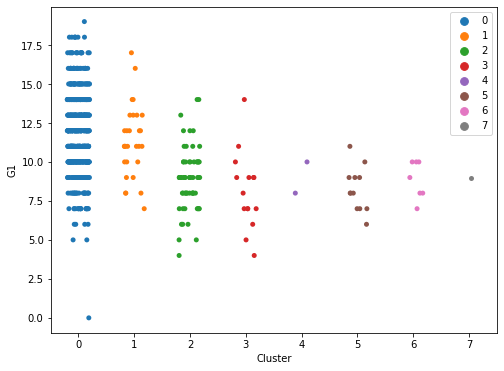

In [260]:
#View clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

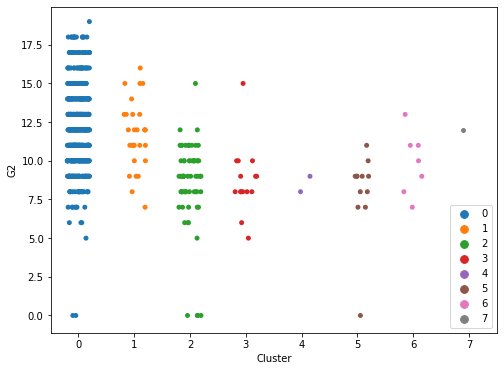

In [261]:
#View clusters by Grade 2
sns.stripplot('clusters', 'G2', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*While the silhouette score for the clustering is almost perfect, there is not a clear pattern for a cluster in terms of the G1 and G2 scores. We can also see that a huge majority of the datapoints are clustered into cluster 0,1and2*

**Clustering with address_U, Pstatus_T, paid_yes, nursery_yes, and internet_yes as the input features.**

In [262]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[11,12,13,14,16]]
k_range=range(3,11)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.4767507751240303 k: 3
0.5126391383509965 k: 4
0.6128667699327223 k: 5
0.7290964762842583 k: 6
0.7894390172032485 k: 7
0.8368623813994333 k: 8
0.8616489561115708 k: 9
0.8975422496454084 k: 10


**We will use 10 as the number of clusters for the selected subset**

In [263]:
#kmeans
clustering = KMeans(n_clusters = 10, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

Text(0.5, 0, 'Cluster')

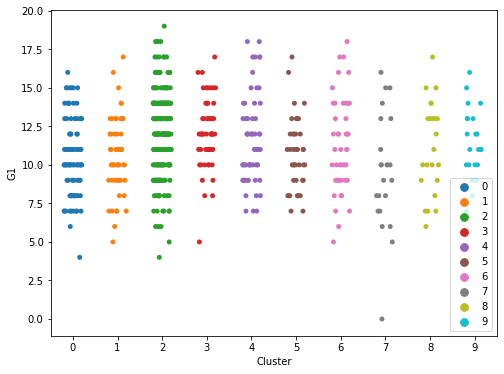

In [264]:
#View clusters by Grade 1
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


Text(0.5, 0, 'Cluster')

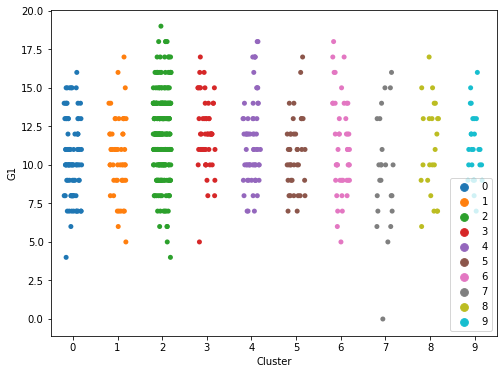

In [265]:
#View clusters by Grade 2
sns.stripplot('clusters', 'G1', data=df2, hue=clusters,jitter=0.2)
plt.xlabel("Cluster")


*While the silhouette score for the clustering is good, there is not a clear pattern for a cluster in terms of the G1 and G2 scores and these are virtually equally distributed across clusters*

**Using G1 and G2 as features to cluster on**

In [266]:
#We will use the silhoutte score to determine the appropriate number of clusters
x_subset=x_clustering[:,[8,9]]
k_range=range(3,11)
for k in k_range:
    clustering = KMeans(n_clusters = k, init = 'k-means++', n_init = 10).fit(x_subset)
    clusters=clustering.labels_
    print(metrics.silhouette_score(x_subset, clusters, metric = "euclidean"),"k:",k)

0.44553968283059003 k: 3
0.42926131521960736 k: 4
0.4451936834575136 k: 5
0.4267317343204977 k: 6
0.39064889527413793 k: 7
0.38625946646208004 k: 8
0.40164807938918234 k: 9
0.39530109457456786 k: 10


**We will use 3 as the number of clusters**

In [267]:
#kmeans
clustering = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10).fit(x_subset)
clusters=clustering.labels_
df2=x
df2["clusters"] = pd.Series(clusters)

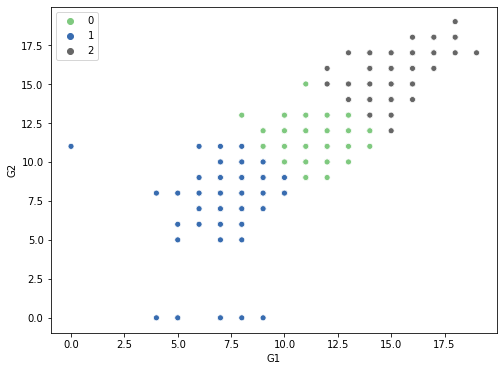

In [269]:
#View scatterplot for the clusters
sns.scatterplot('G1', 'G2', data=df2, hue=clusters,palette="Accent")


**We can clearly see the clusters aligning with the grades here, from lower scores for both g1 and g2 to higher scores, with little to no overlap. We can also conclude that usually a low G1 score co-relates with a low G2 score**